# Import Library

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.preprocessing import LabelEncoder

# Import Data

In [49]:
df = pd.read_csv('/content/sample_data/heartDisease.csv', index_col=0)
df

,usia,jenis kelamin,nyeri dada,trestbps,cholestoral,fasting blood sugar,restecg,denyut jantung,exang,oldpeak,slope,ca,thalium,diagnosis
0,63,Laki-laki,Asymptomatic,145,233,1,0,150,0,2.3,Upsloping,0,1,Jantung
1,37,Laki-laki,Non-anginal pain,130,250,0,1,187,0,3.5,Upsloping,0,2,Jantung
2,41,Perempuan,Atypical angina,130,204,0,0,172,0,1.4,Downslopins,0,2,Jantung
3,56,Laki-laki,Atypical angina,120,236,0,1,178,0,0.8,Downslopins,0,2,Jantung
4,57,Perempuan,Typical angina,120,354,0,1,163,1,0.6,Downslopins,0,2,Jantung
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,Perempuan,Typical angina,140,241,0,1,123,1,0.2,Flatsloping,0,3,Normal
299,45,Laki-laki,Asymptomatic,110,264,0,1,132,0,1.2,Flatsloping,0,3,Normal
300,68,Laki-laki,Typical angina,144,193,1,1,141,0,3.4,Flatsloping,2,3,Normal
301,57,Laki-laki,Typical angina,130,131,0,1,115,1,1.2,Flatsloping,1,3,Normal


In [50]:
df.shape

(303, 14)

In [51]:
df.diagnosis.value_counts()

,count
diagnosis,
Jantung,165
Normal,138


# Cleaning Data

In [52]:
df.isnull().sum()

,0
usia,0
jenis kelamin,0
nyeri dada,0
trestbps,0
cholestoral,0
fasting blood sugar,0
restecg,0
denyut jantung,0
exang,0
oldpeak,0


In [53]:
df.duplicated().sum()

1

In [54]:
df = df.drop_duplicates()

# Exploratory Data Analysis (EDA)

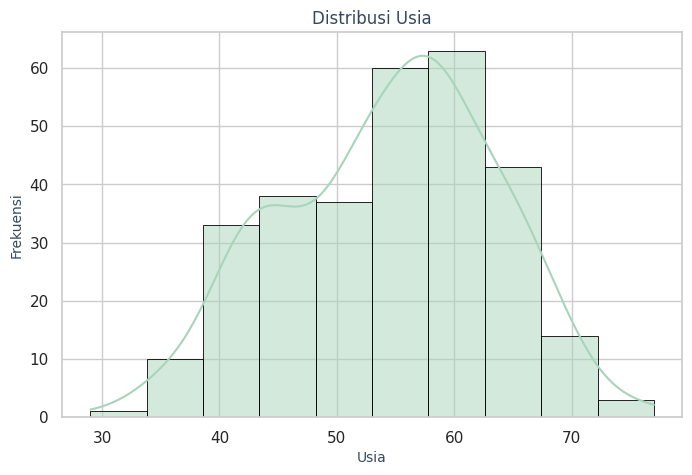

In [55]:
sns.set(style='whitegrid')
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='usia', bins=10, kde=True, color='#A8D5BA', edgecolor='black', linewidth=0.6)
plt.title('Distribusi Usia', fontsize=12, color='#34495E')
plt.xlabel('Usia', fontsize=10, color='#34495E')
plt.ylabel('Frekuensi', fontsize=10, color='#34495E')
plt.show()

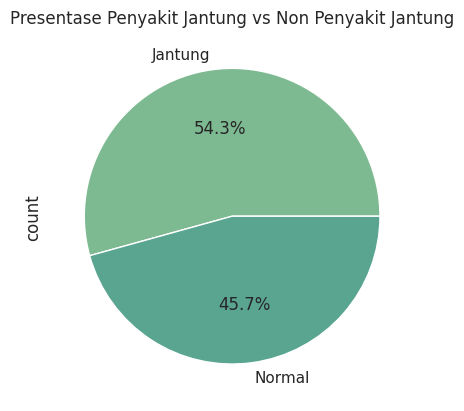

In [56]:
sns.set_palette('crest')
df['diagnosis'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Presentase Penyakit Jantung vs Non Penyakit Jantung")
plt.show()

# Preparation Data

In [57]:
jk_encoder = LabelEncoder()
nd_encoder = LabelEncoder()
s_encoder = LabelEncoder()

df['jenis kelamin'] = jk_encoder.fit_transform(df['jenis kelamin'])
df['nyeri dada'] = nd_encoder.fit_transform(df['nyeri dada'])
df['slope'] = s_encoder.fit_transform(df['slope'])
df['diagnosis'] = df['diagnosis'].map({'Jantung':1, 'Normal':0})

<ipython-input-57-382342b79ec6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['jenis kelamin'] = jk_encoder.fit_transform(df['jenis kelamin'])
<ipython-input-57-382342b79ec6>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['nyeri dada'] = nd_encoder.fit_transform(df['nyeri dada'])
<ipython-input-57-382342b79ec6>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

In [58]:
df

,usia,jenis kelamin,nyeri dada,trestbps,cholestoral,fasting blood sugar,restecg,denyut jantung,exang,oldpeak,slope,ca,thalium,diagnosis
0,63,0,0,145,233,1,0,150,0,2.3,2,0,1,1
1,37,0,2,130,250,0,1,187,0,3.5,2,0,2,1
2,41,1,1,130,204,0,0,172,0,1.4,0,0,2,1
3,56,0,1,120,236,0,1,178,0,0.8,0,0,2,1
4,57,1,3,120,354,0,1,163,1,0.6,0,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,1,3,140,241,0,1,123,1,0.2,1,0,3,0
299,45,0,0,110,264,0,1,132,0,1.2,1,0,3,0
300,68,0,3,144,193,1,1,141,0,3.4,1,2,3,0
301,57,0,3,130,131,0,1,115,1,1.2,1,1,3,0


In [59]:
X = df.drop(columns=['diagnosis'])
y = df['diagnosis']

print("X : ", X.shape)
print("Y : ", y.shape)

X :  (302, 13)
Y :  (302,)


In [60]:
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modeling And Evaluation Data (SVM, KNN, Decision Tree)

In [62]:
models = {
    "Decision Tree": DecisionTreeClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(kernel='linear')
}

In [63]:
results = []
for model_name, model in models.items():
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)

    results.append({
        "Model": model_name,
        "Accuracy": accuracy,
        "Precision": report["weighted avg"]["precision"],
        "Recal": report["weighted avg"]["recall"],
        "F1-Score": report["weighted avg"]["f1-score"]
    })

evaluation_df = pd.DataFrame(results)
evaluation_df

,Model,Accuracy,Precision,Recal,F1-Score
0,Decision Tree,0.770492,0.783462,0.770492,0.769379
1,K-Nearest Neighbors,0.918033,0.922484,0.918033,0.918033
2,Support Vector Machine,0.819672,0.823647,0.819672,0.819672


# Testing

In [64]:
df.sample(5)

,usia,jenis kelamin,nyeri dada,trestbps,cholestoral,fasting blood sugar,restecg,denyut jantung,exang,oldpeak,slope,ca,thalium,diagnosis
231,57,0,3,165,289,1,0,124,0,1.0,1,3,3,0
70,54,0,2,120,258,0,0,147,0,0.4,1,0,3,1
101,59,0,0,178,270,0,0,145,0,4.2,2,0,3,1
296,63,1,3,124,197,0,1,136,1,0.0,1,0,2,0
167,62,1,3,140,268,0,0,160,0,3.6,2,2,2,0


In [69]:
new_data = pd.DataFrame({
    'usia':[63],
    'jenis kelamin': ["Laki-laki"],
    'nyeri dada': ["Asymptomatic"],
    'trestbps': [145],
    'cholestoral': [233],
    'fasting blood sugar': [1],
    'restecg':[0],
    'denyut jantung': [150],
    'exang': [0],
    'oldpeak':[2.3],
    'slope':["Upsloping"],
    'ca': [0],
    'thalium': [1],
})

new_data

,usia,jenis kelamin,nyeri dada,trestbps,cholestoral,fasting blood sugar,restecg,denyut jantung,exang,oldpeak,slope,ca,thalium
0,63,Laki-laki,Asymptomatic,145,233,1,0,150,0,2.3,Upsloping,0,1


In [70]:
new_data['jenis kelamin'] = jk_encoder.transform(new_data['jenis kelamin'])
new_data['nyeri dada'] = nd_encoder.transform(new_data['nyeri dada'])
new_data['slope'] = s_encoder.transform(new_data['slope'])
new_data

,usia,jenis kelamin,nyeri dada,trestbps,cholestoral,fasting blood sugar,restecg,denyut jantung,exang,oldpeak,slope,ca,thalium
0,63,0,0,145,233,1,0,150,0,2.3,2,0,1


In [71]:
new_data_scaled = scaler.transform(new_data)

for model_name, model in models.items():
    prediction = model.predict(new_data_scaled)
    hasil_prediksi = "Normal" if prediction[0] == 0 else "Jantung"
    print(f"Prediksi dari model {model_name}: {hasil_prediksi}")

Prediksi dari model Decision Tree: Jantung
Prediksi dari model K-Nearest Neighbors: Jantung
Prediksi dari model Support Vector Machine: Jantung
